In [ ]:
import pandas as pd

# Load the shapefiles
df_large = pd.read_csv("df_large.csv")
df_small = pd.read_csv("df_small.csv")

# Display attribute tables (first 5 rows)
print("🔍 Attribute table of Large Dataset:")
print(df_large.head(), "\n")

print("🔍 Attribute table of Small Dataset:")
print(df_small.head(), "\n")

# Optional: Check columns of both files to ensure similarity
print("📋 Columns in Large Dataset:", df_large.columns.tolist())
print("📋 Columns in Small Dataset:", df_small.columns.tolist())

# Rename 'Distance_D' to 'Distance from Drainage' (if exists)
rename_column = {"Distance_D": "Distance from Drainage"}

df_large.rename(columns=rename_column, inplace=True)
df_small.rename(columns=rename_column, inplace=True)

# Show updated attribute tables
print("\n✅ Updated Attribute Table - Large Dataset:")
print(df_large.head())

print("\n✅ Updated Attribute Table - Small Dataset:")
print(df_small.head())


In [ ]:
# Step 1: Drop 'cluster' column if it exists in gdf_small
if 'Final_Merged' in df_small.columns:
    df_small.drop(columns=['Final_Merged'], inplace=True)
    print("✅ 'Final_Merged' column dropped from small dataset.\n")

# Step 2: Compare columns
columns_large = set(df_large.columns)
columns_small = set(df_small.columns)

# Check if columns match
if columns_large == columns_small:
    print("Column names match exactly between both datasets.\n")
else:
    print("Column names do NOT match.\n")
    print("Columns in Large Dataset but not in Small:", columns_large - columns_small)
    print("Columns in Small Dataset but not in Large:", columns_small - columns_large)

# Step 3: Compare number of columns
print(f"\n📊 Number of columns:\n- Large: {len(df_large.columns)}\n- Small: {len(df_small.columns)}")

# Step 4: Show number of rows
print(f"\n📏 Number of rows:\n- Large: {len(df_large)}\n- Small: {len(df_small)}")


✅ 'Final_Merged' column dropped from small dataset.

Column names match exactly between both datasets.


📊 Number of columns:
- Large: 17
- Small: 17

📏 Number of rows:
- Large: 2719466
- Small: 8118


In [10]:
# 0 sec

total_nans = df_small.isna().sum()
print("Total NaN cells in small:\n", total_nans, sep="")

total_nans = df_large.isna().sum()
print("Total NaN cells in large:\n", total_nans, sep="")

cols = df_large.columns
print(cols)

Total NaN cells in small:
x                 0
y                 0
Aspect            0
Dist2Lineament    0
Dist2Road         0
Dist2Stream       0
Elevation         0
Geomorphology     0
Lithology         0
LULC              0
Plan_Cur          0
Pro_Cur           0
Roughness         0
Slope             0
Soil              0
SPI               0
TWI               0
dtype: int64


Total NaN cells in large:
x                 0
y                 0
Aspect            0
Dist2Lineament    0
Dist2Road         0
Dist2Stream       0
Elevation         0
Geomorphology     0
Lithology         0
LULC              0
Plan_Cur          0
Pro_Cur           0
Roughness         0
Slope             0
Soil              0
SPI               0
TWI               0
dtype: int64
Index(['x', 'y', 'Aspect', 'Dist2Lineament', 'Dist2Road', 'Dist2Stream',
       'Elevation', 'Geomorphology', 'Lithology', 'LULC', 'Plan_Cur',
       'Pro_Cur', 'Roughness', 'Slope', 'Soil', 'SPI', 'TWI'],
      dtype='object')


Dropped unnecessary columns.

VIF and Tolerance Table:

           Feature       VIF  Tolerance
14             TWI  4.427355   0.225868
13             SPI  4.148059   0.241077
10       Roughness  3.155056   0.316952
11           Slope  3.104670   0.322095
5    Geomorphology  2.316552   0.431676
4        Elevation  1.864152   0.536437
8         Plan_Cur  1.537285   0.650498
9          Pro_Cur  1.530180   0.653518
12            Soil  1.283476   0.779134
2        Dist2Road  1.198369   0.834467
6        Lithology  1.159483   0.862453
3      Dist2Stream  1.147942   0.871124
7             LULC  1.065961   0.938120
1   Dist2Lineament  1.065423   0.938594
0           Aspect  1.005749   0.994284

Correlation Matrix:

                  Aspect  Dist2Lineament  Dist2Road  Dist2Stream  Elevation  \
Aspect          1.000000        0.005437   0.045518     0.021364  -0.024062   
Dist2Lineament  0.005437        1.000000   0.181321     0.134873   0.072839   
Dist2Road       0.045518        0.181321   1.

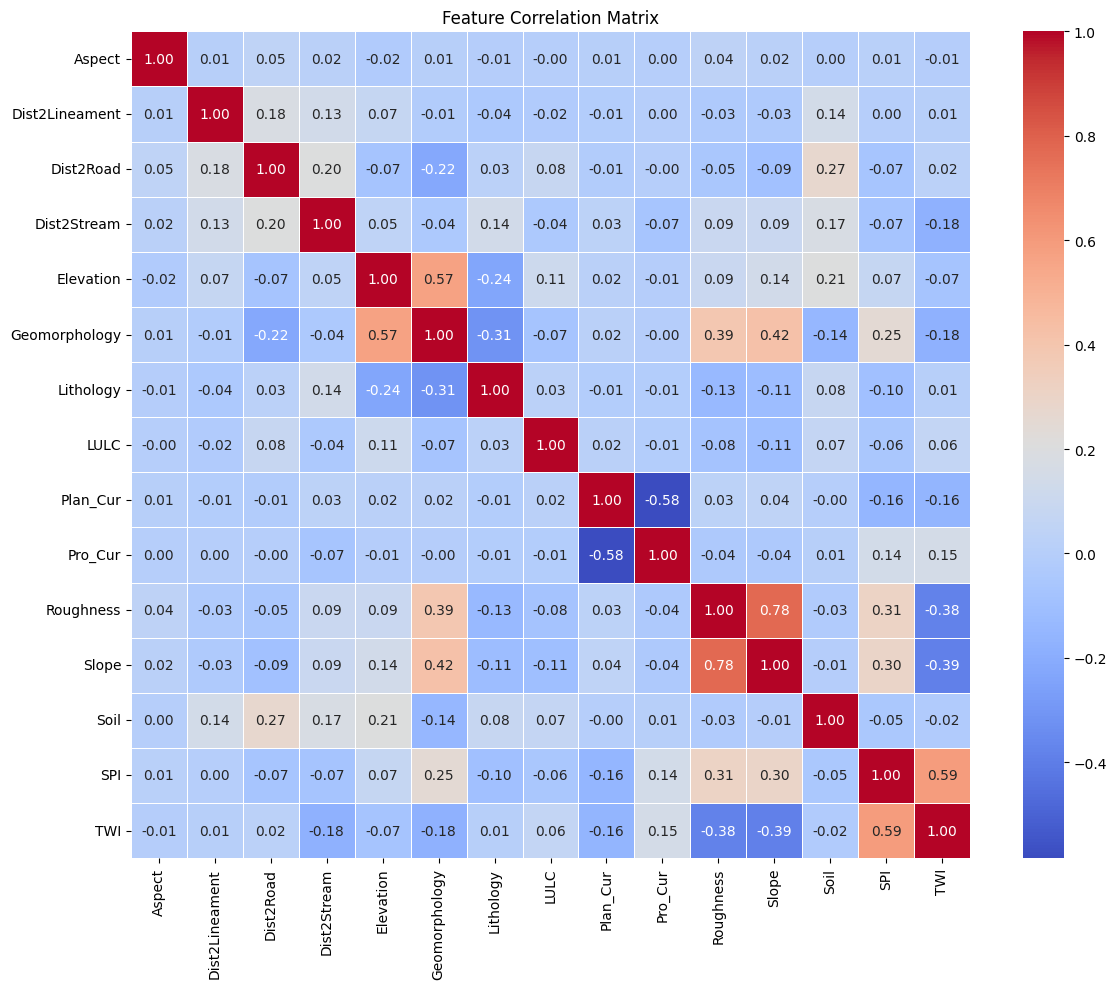

C:\Users\subas\AppData\Local\Temp\ipykernel_19180\1714377397.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_data, x="VIF", y="Feature", palette="viridis")


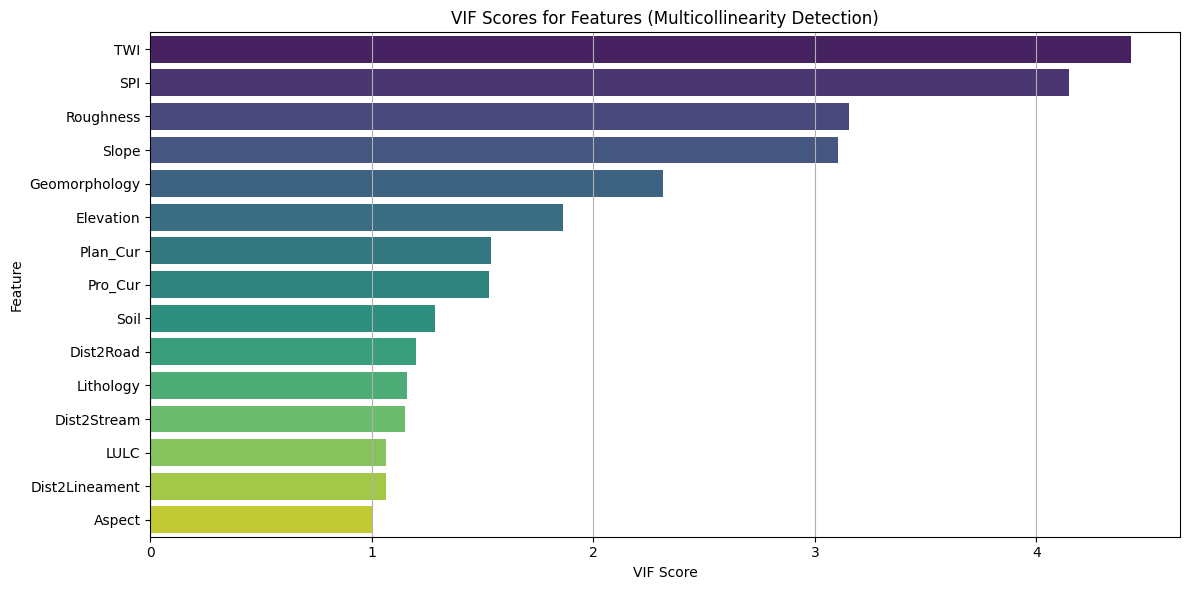

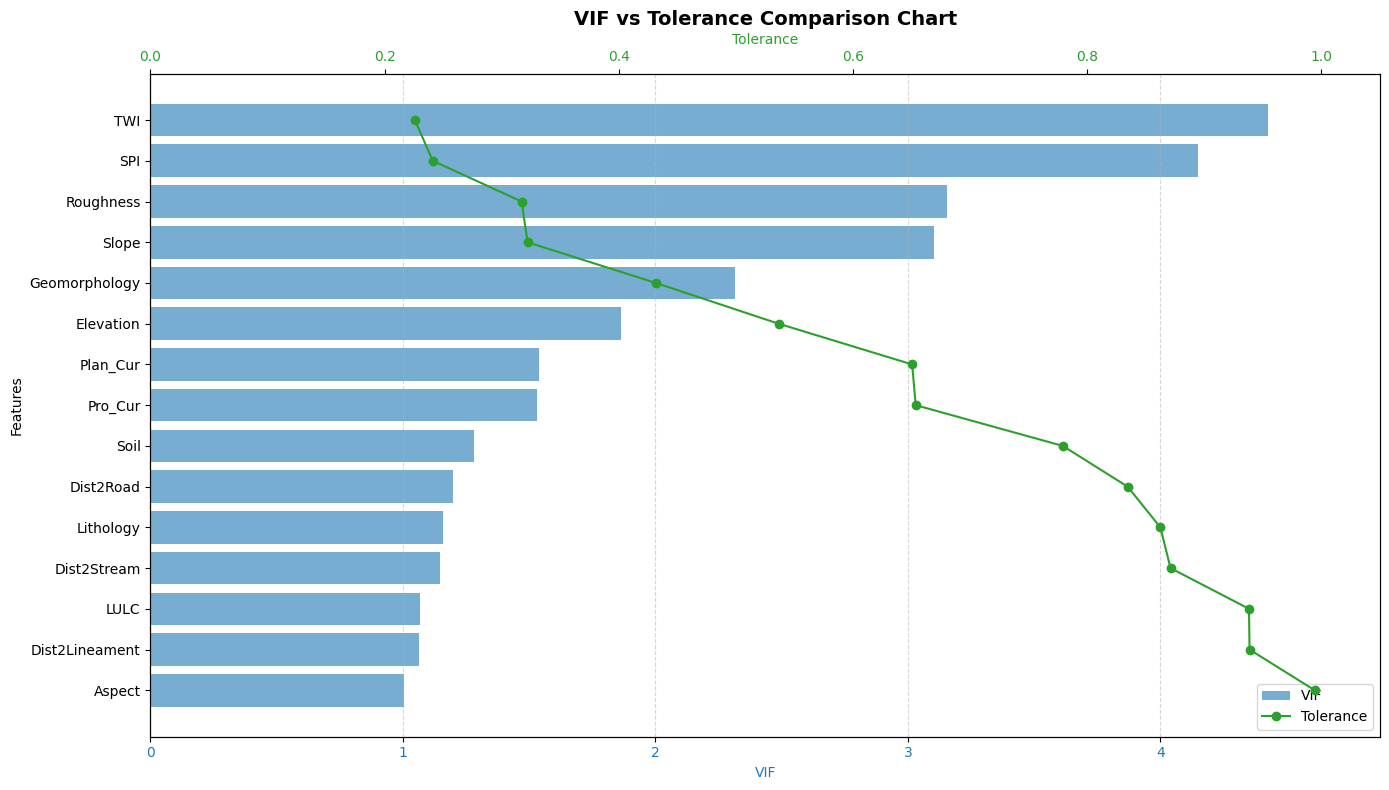

In [11]:
# 5 sec

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# ------------------ STEP 1: Drop unwanted columns ------------------

columns_to_drop = ['x','y']

# Drop from both datasets
df_large.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_small.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Dropped unnecessary columns.\n")

# ------------------ STEP 2: Multicollinearity Analysis ------------------

# Convert to pandas DataFrame and drop geometry (not useful for VIF)
#df_ml = df_small.drop(columns='geometry')
df_ml = df_small.copy()

# Scale features for better VIF stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# Calculate VIF and Tolerance
vif_data = pd.DataFrame()
vif_data['Feature'] = df_ml.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data['Tolerance'] = 1 / vif_data['VIF']

# Sort by VIF descending
vif_data.sort_values(by="VIF", ascending=False, inplace=True)

print("VIF and Tolerance Table:\n")
print(vif_data)

# ------------------ STEP 3: Correlation Matrix ------------------

corr_matrix = df_ml.corr()

# Display the matrix
print("\nCorrelation Matrix:\n")
print(corr_matrix)

# ------------------ STEP 4: Visualization ------------------

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# VIF Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=vif_data, x="VIF", y="Feature", palette="viridis")
plt.title("VIF Scores for Features (Multicollinearity Detection)")
plt.xlabel("VIF Score")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ------------------ STEP 5: Innovative VIF + Tolerance Chart ------------------

fig, ax1 = plt.subplots(figsize=(14, 8))

# Sort for prettier visual
vif_plot_data = vif_data.sort_values("VIF", ascending=True)

# Plot VIF bars
color_vif = 'tab:blue'
ax1.barh(vif_plot_data["Feature"], vif_plot_data["VIF"], color=color_vif, alpha=0.6, label='VIF')
ax1.set_xlabel("VIF", color=color_vif)
ax1.tick_params(axis='x', labelcolor=color_vif)
ax1.set_xlim(0, max(vif_plot_data["VIF"]) * 1.1)
ax1.set_ylabel("Features")
ax1.set_title("VIF vs Tolerance Comparison Chart", fontsize=14, weight='bold')

# Create a second x-axis sharing the same y
ax2 = ax1.twiny()
color_tol = 'tab:green'
ax2.plot(vif_plot_data["Tolerance"], vif_plot_data["Feature"], "o-", color=color_tol, label='Tolerance')
ax2.set_xlabel("Tolerance", color=color_tol)
ax2.tick_params(axis='x', labelcolor=color_tol)
ax2.set_xlim(0, 1.05)

# Grid & Layout
ax1.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Legend
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='lower right')

plt.show()


In [12]:
# 17 min

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# -------------------------------
# 1. Load data
# -------------------------------
df_large = pd.read_csv("df_large.csv")
df_small = pd.read_csv("df_small.csv")

# -------------------------------
# 2. Prepare features and target
# -------------------------------
df_small.drop(columns=['x', 'y', 'Dist2Road'], inplace=True)
target_col = "Final_Merged"
X = df_small.drop(columns=[target_col])
y = df_small[target_col]

# -------------------------------
# 3. Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# -------------------------------
# 4. Define Models
# -------------------------------
models = {
    "LR_prob": LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        solver="liblinear",
        random_state=42
    ),

    "CatBoost_prob": CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.05,
        eval_metric='AUC',
        verbose=0,
        random_seed=42
    ),

    "SVM_prob": GridSearchCV(
        make_pipeline(StandardScaler(),
                      SVC(probability=True, kernel="rbf", class_weight="balanced", random_state=42)),
        param_grid={
            "svc__C": [0.1, 1, 10],
            "svc__gamma": ["scale", "auto"]
        },
        scoring="roc_auc",
        cv=3,
        n_jobs=-1
    ),

    "XGBoost_prob": XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),

    "RF_prob": RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "C5.0_prob": DecisionTreeClassifier(
        criterion="entropy",
        max_depth=None,
        random_state=42
    )
}

# -------------------------------
# 5. Train, Evaluate, Predict
# -------------------------------
X_large = df_large[X.columns]  # features from df_large

model_predictions = {}
for col_name, model in models.items():
    print(f"\n🔹 Training {col_name} ...")
    model.fit(X_train, y_train)

    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model

    # Evaluation
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{col_name} AUC: {auc:.4f}")
    print(classification_report(y_test, (y_pred_proba > 0.5).astype(int)))

    # Save probabilities for ensemble
    model_predictions[col_name] = best_model.predict_proba(X_test)[:, 1]
    df_large[col_name] = (1 - best_model.predict_proba(X_large)[:, 1]) * 100  # in %

# -------------------------------
# 6. Ensemble Model (Stacking)
# -------------------------------
print("\n🔹 Building Ensemble (Stacking) Model ...")

# Create base learners for stacking
base_learners = [(name, model) for name, model in models.items()]

meta_model = LogisticRegression(max_iter=2000, random_state=42)

ensemble = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1,
    passthrough=True
)

ensemble.fit(X_train, y_train)

# Evaluate ensemble
y_pred_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]
ensemble_auc = roc_auc_score(y_test, y_pred_proba_ensemble)
print(f"\n🌟 Ensemble AUC: {ensemble_auc:.4f}")
print(classification_report(y_test, (y_pred_proba_ensemble > 0.5).astype(int)))

# Predict on large dataset
df_large["Ensemble_prob"] = (1 - ensemble.predict_proba(X_large)[:, 1]) * 100

# -------------------------------
# 7. Save results
# -------------------------------
df_large.to_csv("df_large_with_predictions.csv", index=False)
print("\n✅ Predictions saved to df_large_with_predictions.csv")



🔹 Training LR_prob ...
LR_prob AUC: 0.8256
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1616
           1       0.76      0.72      0.74      1632

    accuracy                           0.75      3248
   macro avg       0.75      0.75      0.75      3248
weighted avg       0.75      0.75      0.75      3248


🔹 Training CatBoost_prob ...
CatBoost_prob AUC: 0.9799
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1616
           1       0.93      0.92      0.93      1632

    accuracy                           0.93      3248
   macro avg       0.93      0.93      0.93      3248
weighted avg       0.93      0.93      0.93      3248


🔹 Training SVM_prob ...
SVM_prob AUC: 0.9152
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1616
           1       0.86      0.84      0.85      1632

    accuracy                        

c:\Users\subas\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:27:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost_prob AUC: 0.9797
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1616
           1       0.94      0.92      0.93      1632

    accuracy                           0.93      3248
   macro avg       0.93      0.93      0.93      3248
weighted avg       0.93      0.93      0.93      3248


🔹 Training RF_prob ...
RF_prob AUC: 0.9790
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1616
           1       0.94      0.91      0.93      1632

    accuracy                           0.93      3248
   macro avg       0.93      0.93      0.93      3248
weighted avg       0.93      0.93      0.93      3248


🔹 Training C5.0_prob ...
C5.0_prob AUC: 0.8956
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1616
           1       0.90      0.90      0.90      1632

    accuracy                           0.90      3248
   macro av

c:\Users\subas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🌟 Ensemble AUC: 0.9847
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1616
           1       0.94      0.94      0.94      1632

    accuracy                           0.94      3248
   macro avg       0.94      0.94      0.94      3248
weighted avg       0.94      0.94      0.94      3248


✅ Predictions saved to df_large_with_predictions.csv


In [13]:
# 0 sec

from sklearn.model_selection import train_test_split
import numpy as np

# Check class balance
print("Class distribution in df_small:")
print(df_small["Final_Merged"].value_counts())

# Stratified split ensures both classes appear in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class counts:", np.bincount(y_train.astype(int)))
print("Test class counts:", np.bincount(y_test.astype(int)))

Class distribution in df_small:
Final_Merged
1    4078
0    4040
Name: count, dtype: int64
Train class counts: [3232 3262]
Test class counts: [808 816]


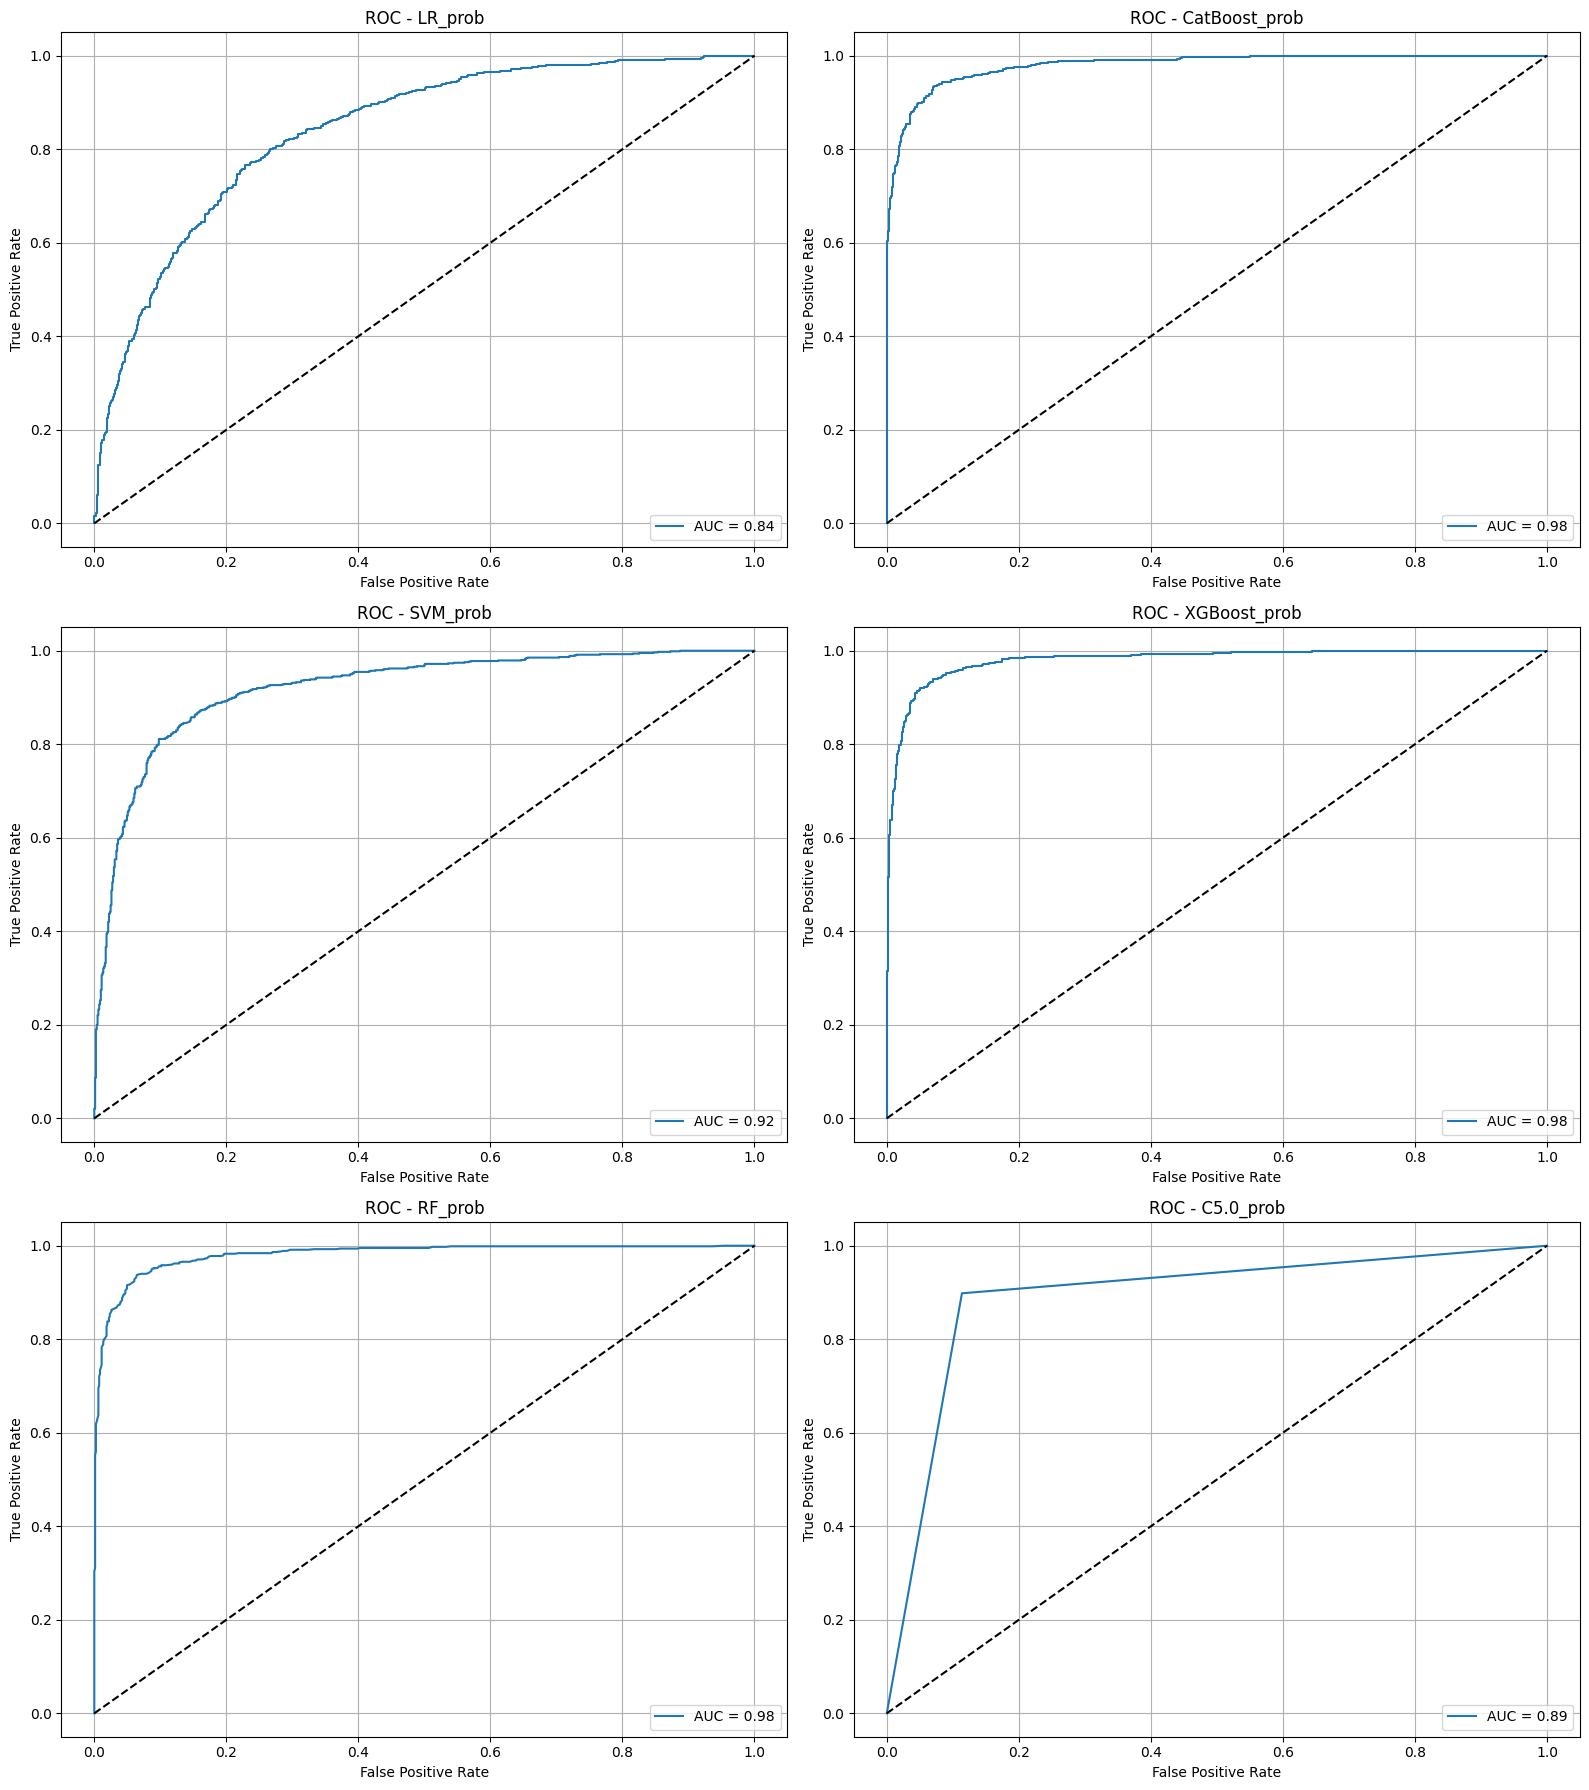

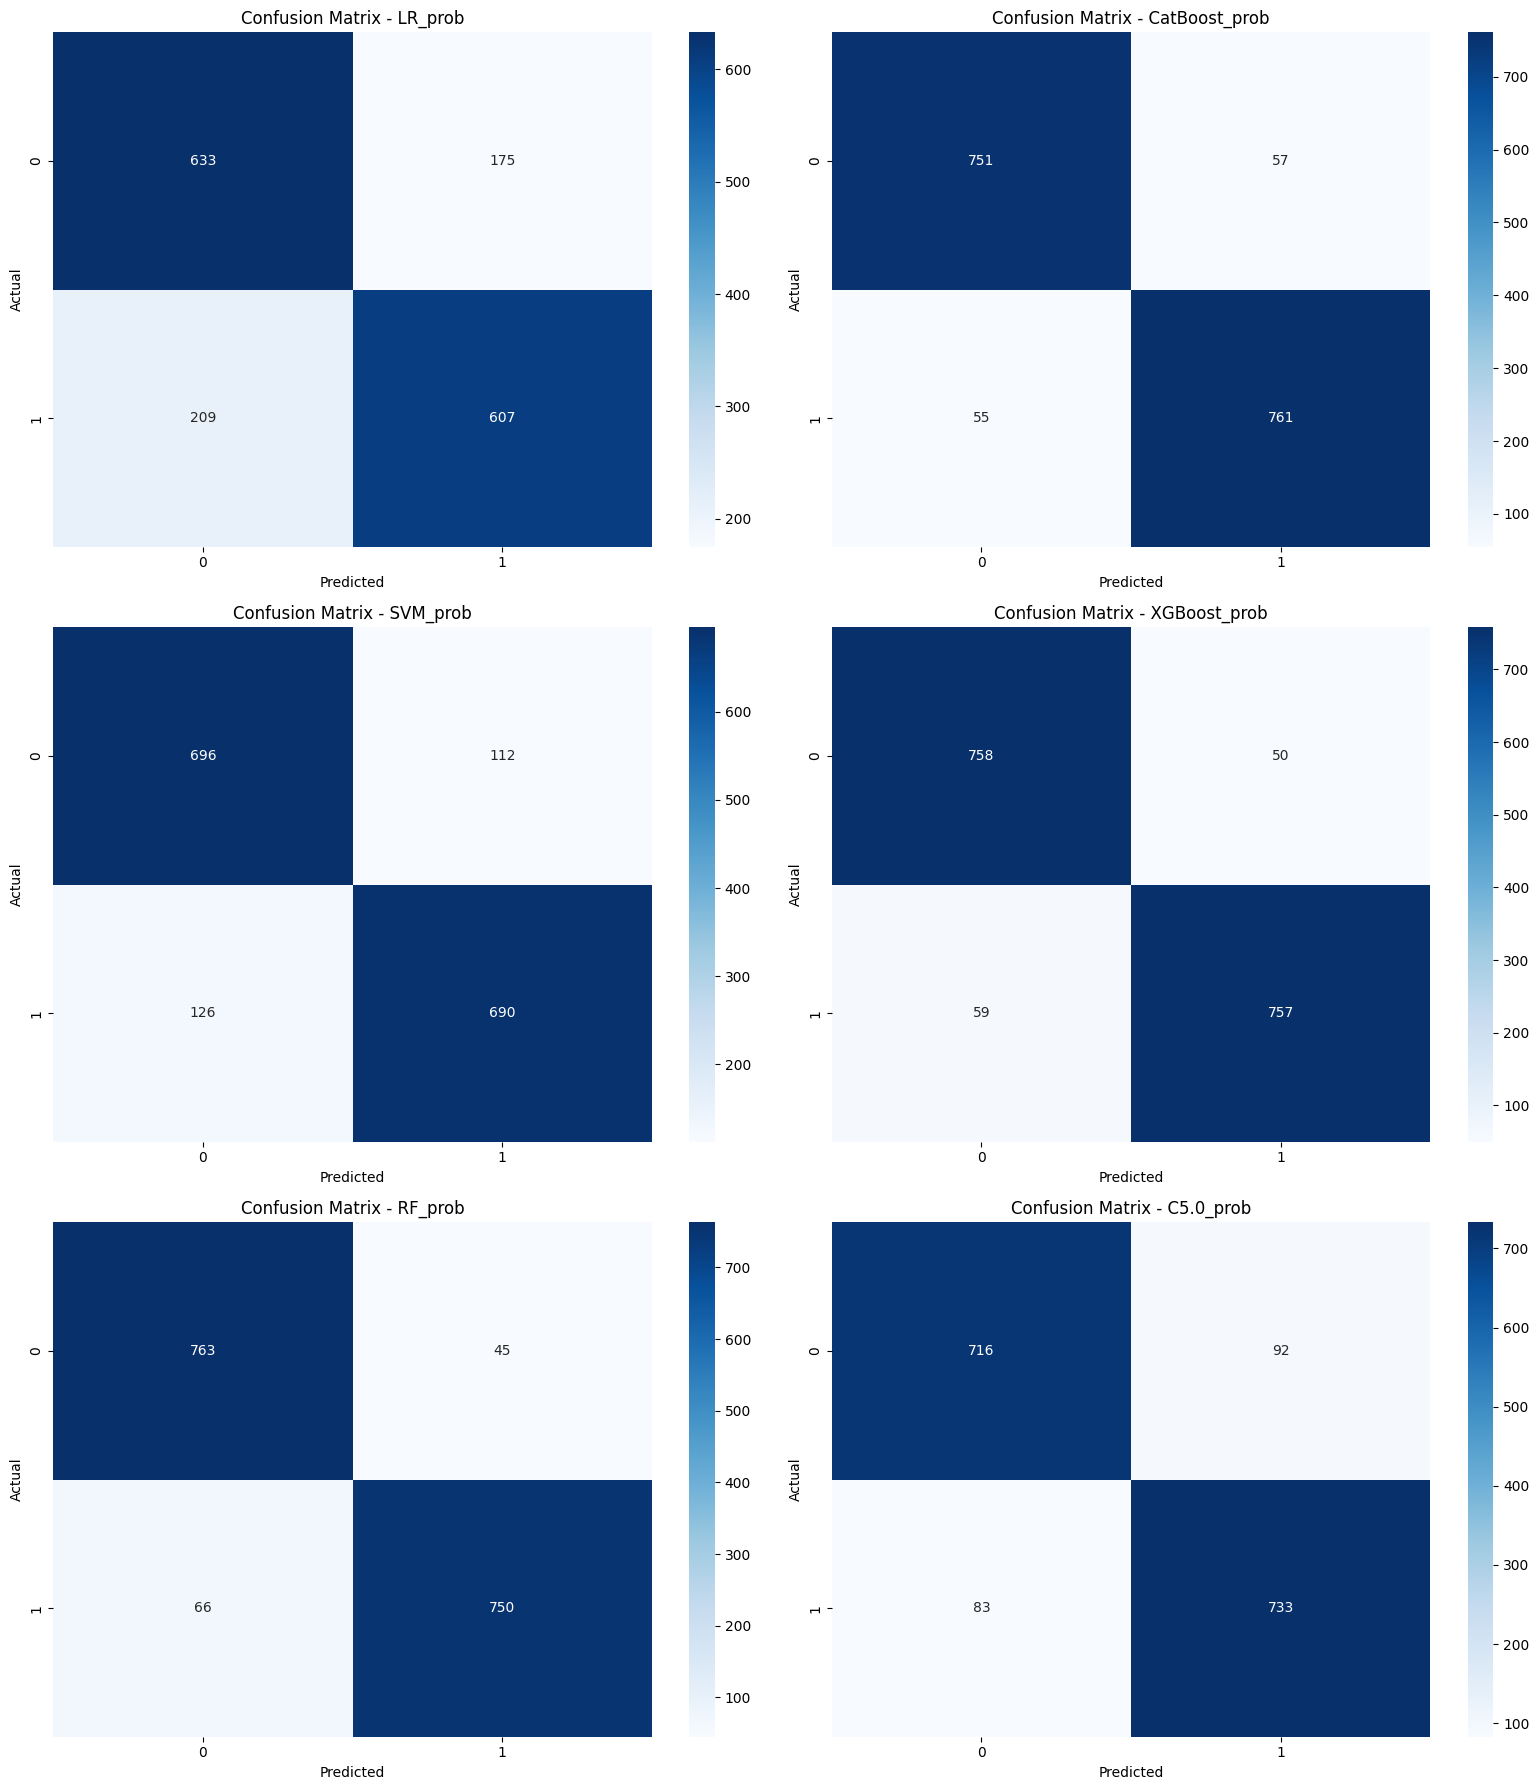

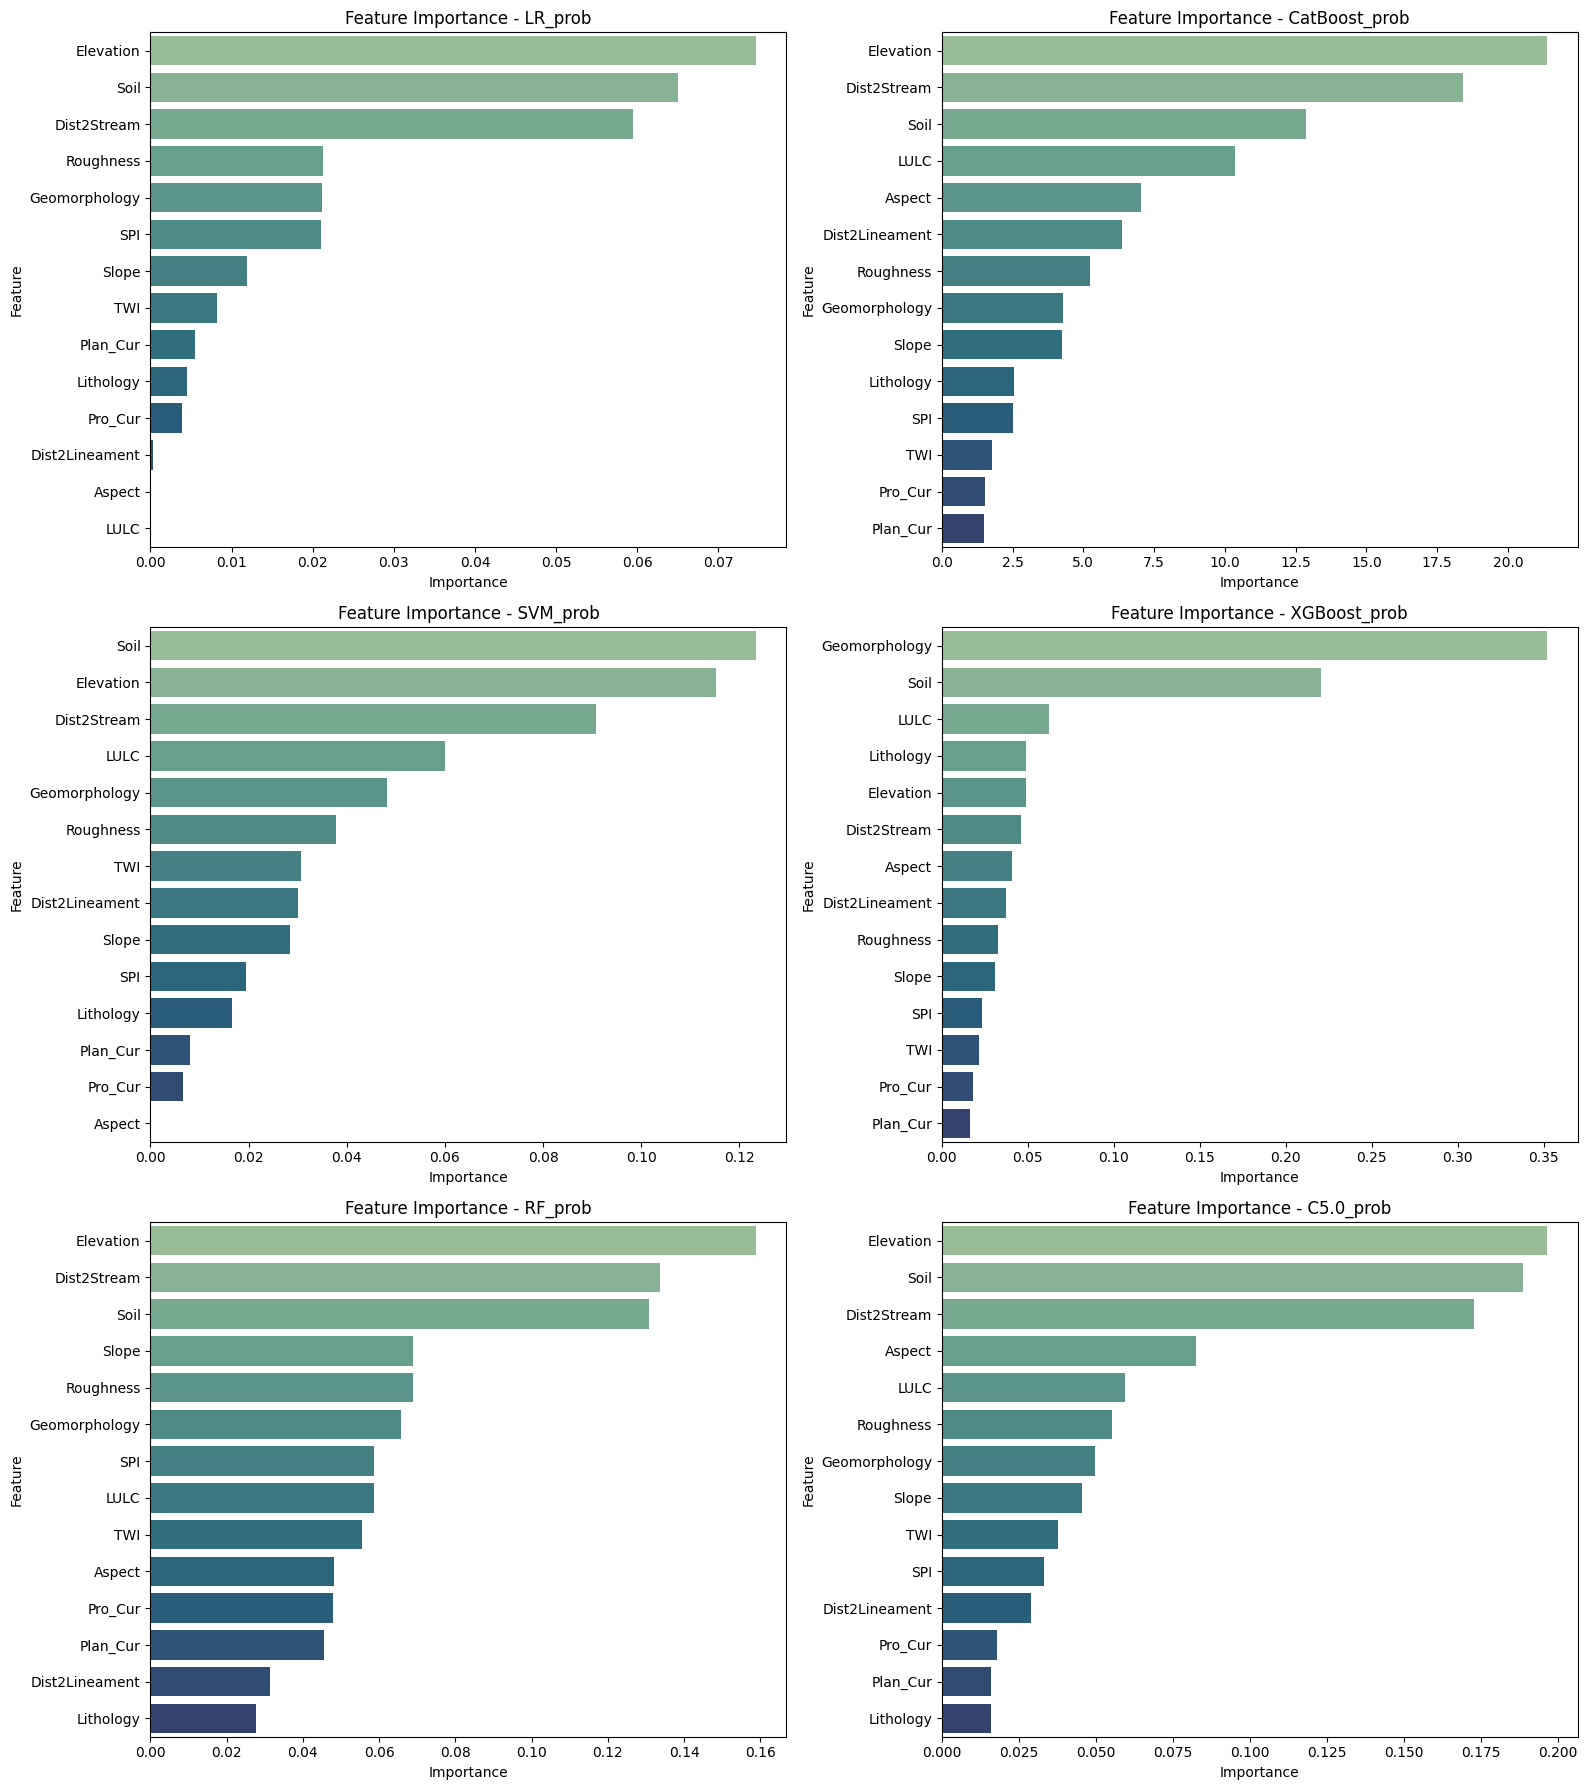

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

# -------------------------------
# ROC Curves in 3x2 Grid
# -------------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for idx, (col_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    axes[idx].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    axes[idx].plot([0, 1], [0, 1], 'k--')
    axes[idx].set_title(f"ROC - {col_name}")
    axes[idx].set_xlabel("False Positive Rate")
    axes[idx].set_ylabel("True Positive Rate")
    axes[idx].legend(loc="lower right")
    axes[idx].grid()

plt.tight_layout()
plt.show()


# -------------------------------
# Confusion Matrices in 3x2 Grid
# -------------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for idx, (col_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {col_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# -------------------------------
# Feature Importance in 3x2 Grid
# -------------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for idx, (col_name, model) in enumerate(models.items()):
    # Handle models with feature_importances_
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        # Use permutation importance for models without feature_importances_
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean

    fi_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
    sns.barplot(
    x="Importance", 
    y="Feature", 
    hue="Feature",          # explicitly use Feature for hue
    legend=False,           # hide redundant legend
    data=fi_df, 
    palette="crest", 
    ax=axes[idx]
)
    axes[idx].set_title(f"Feature Importance - {col_name}")

plt.tight_layout()
plt.show()


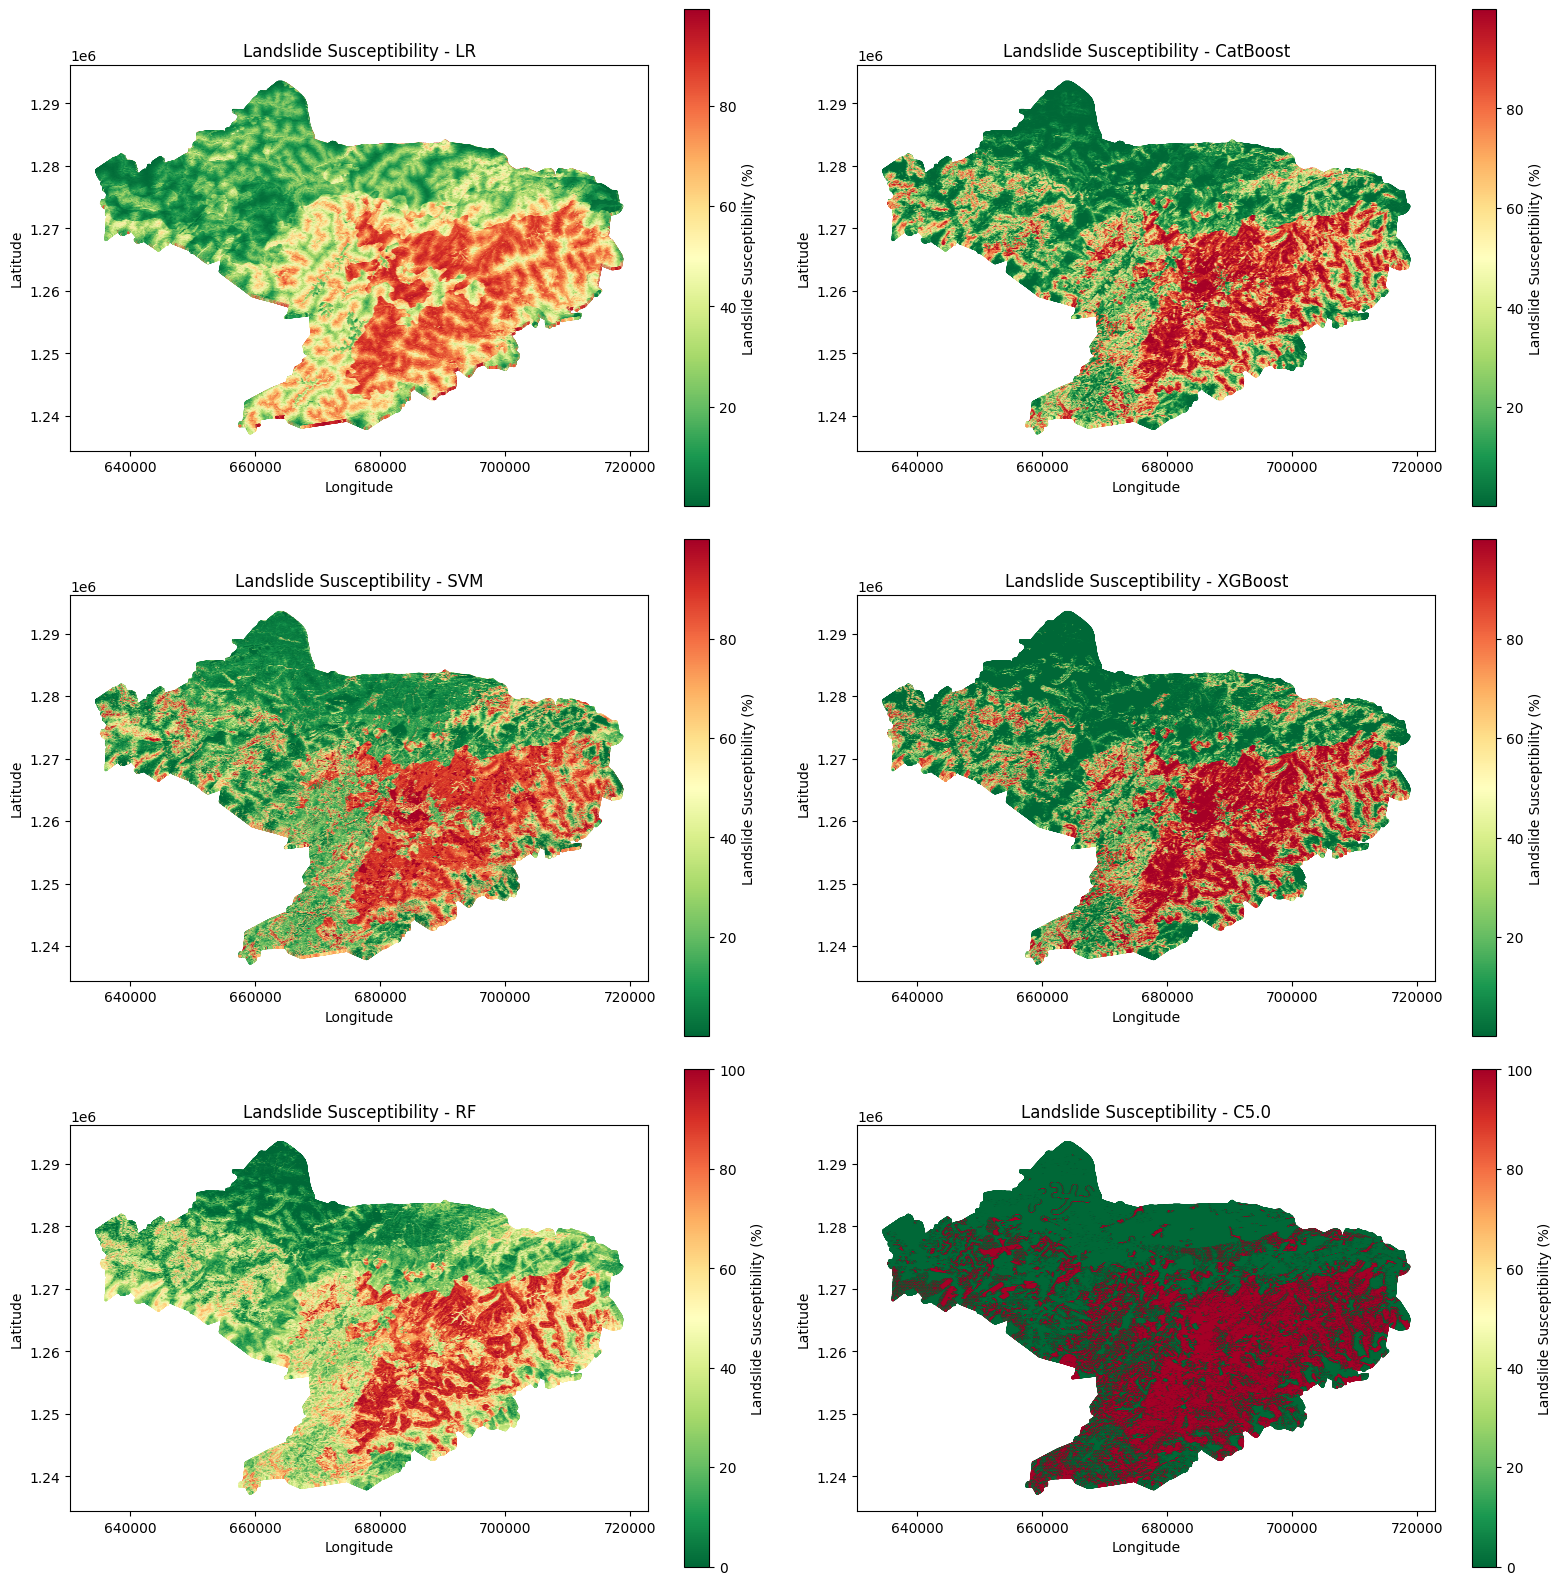

In [15]:
# 3 min 2 sec

import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv("df_large_with_predictions.csv")

# List of model probability columns
prob_cols = ["LR_prob", "CatBoost_prob", "SVM_prob", "XGBoost_prob", "RF_prob", "C5.0_prob"]

# Create a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.ravel()

for i, col in enumerate(prob_cols):
    sc = axes[i].scatter(df["x"], df["y"], c=df[col], cmap="RdYlGn_r", s=1)
    plt.colorbar(sc, ax=axes[i], label="Landslide Susceptibility (%)")
    axes[i].set_title(f"Landslide Susceptibility - {col.replace('_prob','')}")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")
    axes[i].set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.show()


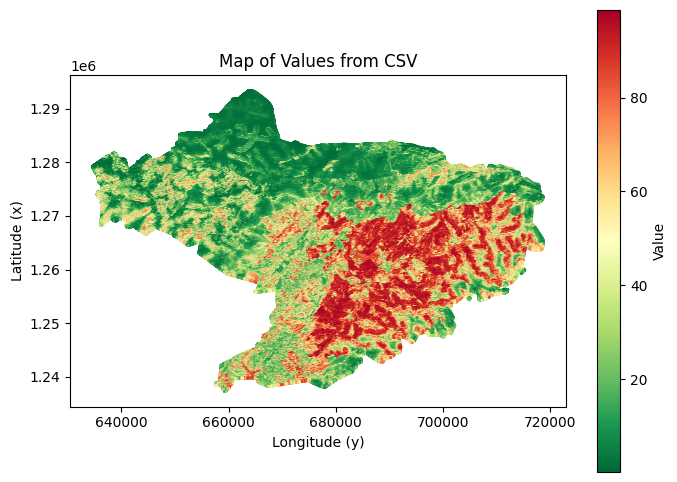

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("df_large_with_predictions.csv")   # columns: x, y, value
prob_cols = ["LR_prob", "CatBoost_prob", "SVM_prob", "XGBoost_prob", "RF_prob", "C5.0_prob"]


plt.figure(figsize=(8, 6))
sc = plt.scatter(df["x"], df["y"], c=sum(df[i] for i in prob_cols)/len(prob_cols), cmap="RdYlGn_r", s=1)

plt.colorbar(sc, label="Value")
plt.xlabel("Longitude (y)")
plt.ylabel("Latitude (x)")
plt.title("Map of Values from CSV")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


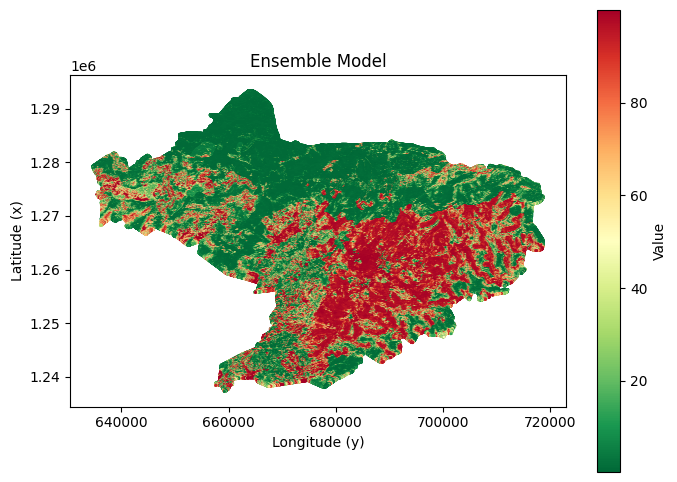

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("df_large_with_predictions.csv")   # columns: x, y, value


plt.figure(figsize=(8, 6))
sc = plt.scatter(df["x"], df["y"], c=df["Ensemble_prob"], cmap="RdYlGn_r", s=1)

plt.colorbar(sc, label="Value")
plt.xlabel("Longitude (y)")
plt.ylabel("Latitude (x)")
plt.title("Ensemble Model")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("df_large_with_predictions.csv")   # columns: x, y, value

Index(['x', 'y', 'Aspect', 'Dist2Lineament', 'Dist2Road', 'Dist2Stream',
       'Elevation', 'Geomorphology', 'Lithology', 'LULC', 'Plan_Cur',
       'Pro_Cur', 'Roughness', 'Slope', 'Soil', 'SPI', 'TWI', 'LR_prob',
       'CatBoost_prob', 'SVM_prob', 'XGBoost_prob', 'RF_prob', 'C5.0_prob',
       'Ensemble_prob'],
      dtype='object')

In [4]:
Columns = df.columns.tolist()
print(Columns)

['x', 'y', 'Aspect', 'Dist2Lineament', 'Dist2Road', 'Dist2Stream', 'Elevation', 'Geomorphology', 'Lithology', 'LULC', 'Plan_Cur', 'Pro_Cur', 'Roughness', 'Slope', 'Soil', 'SPI', 'TWI', 'LR_prob', 'CatBoost_prob', 'SVM_prob', 'XGBoost_prob', 'RF_prob', 'C5.0_prob', 'Ensemble_prob']


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load CSV
# -------------------------------
csv_path = "df_large_with_predictions.csv"
output_dir = "png_outputs"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(csv_path)

In [19]:
# -------------------------------
# 2. Identify probability columns
# -------------------------------
prob_cols = [c for c in df.columns if c.endswith("_prob")]
print(f"Found probability columns: {prob_cols}")

# -------------------------------
# 3. Sort & prepare coordinate grid
# -------------------------------
df = df.sort_values(by=["y", "x"], ascending=[True, True]).reset_index(drop=True)
# ↑ sort ascending in both directions so that y increases downward in array indexing

x_unique = np.sort(df["x"].unique())
y_unique = np.sort(df["y"].unique())

# -------------------------------
# 4. Generate PNGs (north-up, transparent nulls)
# -------------------------------
for col in prob_cols:
    print(f"Rendering PNG for {col} ...")

    # Pivot to 2D grid and convert to float32
    grid = df.pivot(index="y", columns="x", values=col).to_numpy().astype(np.float32)

    # Flip vertically (so north is up)
    grid = np.flipud(grid)

    # Create alpha mask (NaN -> transparent)
    alpha = np.where(np.isnan(grid), 0, 1).astype(np.float32)

    # Plot
    plt.figure(figsize=(12, 9), dpi=302)
    plt.imshow(grid, cmap="RdYlGn_r", alpha=alpha, origin="upper", vmin=0, vmax=100)
    plt.axis("off")

    # Save transparent PNG
    out_path = os.path.join(output_dir, f"{col}.png")
    plt.savefig(out_path, bbox_inches="tight", pad_inches=0, transparent=True)
    plt.close()

    print(f"✅ Saved {out_path}")

print("\n🎨 All PNGs saved correctly oriented (north-up) with transparent nulls.")


Found probability columns: ['LR_prob', 'CatBoost_prob', 'SVM_prob', 'XGBoost_prob', 'RF_prob', 'C5.0_prob', 'Ensemble_prob']
Rendering PNG for LR_prob ...
✅ Saved png_outputs\LR_prob.png
Rendering PNG for CatBoost_prob ...
✅ Saved png_outputs\CatBoost_prob.png
Rendering PNG for SVM_prob ...
✅ Saved png_outputs\SVM_prob.png
Rendering PNG for XGBoost_prob ...
✅ Saved png_outputs\XGBoost_prob.png
Rendering PNG for RF_prob ...
✅ Saved png_outputs\RF_prob.png
Rendering PNG for C5.0_prob ...
✅ Saved png_outputs\C5.0_prob.png
Rendering PNG for Ensemble_prob ...
✅ Saved png_outputs\Ensemble_prob.png

🎨 All PNGs saved correctly oriented (north-up) with transparent nulls.
